**Machine Learning Lab Digital Assignment-03**

**HARSH AGRAWAL-22BCE2391**

1. Write a program to construct a Bayesian network considering medical data. Use this 
model to demonstrate the diagnosis of heart patients using standard Heart Disease 
Data Set. Calculate the accuracy, precision, and recall for your data set. 

In [4]:
import pandas as pd
import csv
import numpy as np
data=pd.read_csv("heartdisease.csv")
heart_disease=pd.DataFrame(data)
print(heart_disease)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

In [5]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
model = BayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease')
])
expected_columns = {'age', 'Gender', 'Family', 'diet', 'Lifestyle', 'cholestrol', 'heartdisease'}
if not expected_columns.issubset(set(heart_disease.columns)):
    raise ValueError("Dataset is missing required columns.")
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

HeartDisease_infer = VariableElimination(model)
print('For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }')
print('For Gender Enter { Male:0, Female:1 }')
print('For Family History Enter { yes:1, No:0 }')
print('For diet Enter { High:0, Medium:1 }')
print('For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }')
print('For cholesterol Enter { High:0, BorderLine:1, Normal:2 }')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('Enter age :')),
    'Gender':int(input('Enter Gender :')),
    'Family':int(input('Enter Family history :')),
    'diet':int(input('Enter diet :')),
    'Lifestyle':int(input('Enter Lifestyle :')),
    'cholestrol':int(input('Enter cholestrol :'))
    })

print(q)

For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }
For Gender Enter { Male:0, Female:1 }
For Family History Enter { yes:1, No:0 }
For diet Enter { High:0, Medium:1 }
For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }
For cholesterol Enter { High:0, BorderLine:1, Normal:2 }
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.8333 |
+-----------------+---------------------+
| heartdisease(1) |              0.1667 |
+-----------------+---------------------+


2. Implement K Nearest Neighbors algorithm for iris dataset and evaluate the algorithm 
with accuracy, precision, recall and F1-score. 

In [6]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [7]:
dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],test_size=0.2,random_state=0)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average="macro")
recall=recall_score(y_test,y_pred, average="macro")
f1=f1_score(y_test,y_pred,average="macro")

print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy:0.9667
Precision:0.9762
Recall:0.9444
F1 Score:0.9574


3. Develop and fine-tune a Multi-Layer Perceptron (MLP) neural network model with 
back-propagation using scikit-learn, perform hyper parameter tuning, and assess its 
performance using various performance measures for a specific machine learning 
task. 

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset["data"], dataset["target"], test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(max_iter=1000, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Fewer options
    'activation': ['relu'],  # Remove 'tanh'
    'solver': ['adam'],  # Remove 'sgd'
    'alpha': [0.0001, 0.001],  # Reduce values
    'learning_rate': ['constant']  # Remove 'adaptive'
}
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
print(f"Best Hyperparameters: {grid_search.best_params_}")  
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


4. Illustrate the K-means clustering to cluster the data points for at least five epochs 
properly. 

    a. Use the elbow method to determine the optimal number of clusters. 

    b. Visualize the clusters. 

    c. Plot the centroids of each cluster. 

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

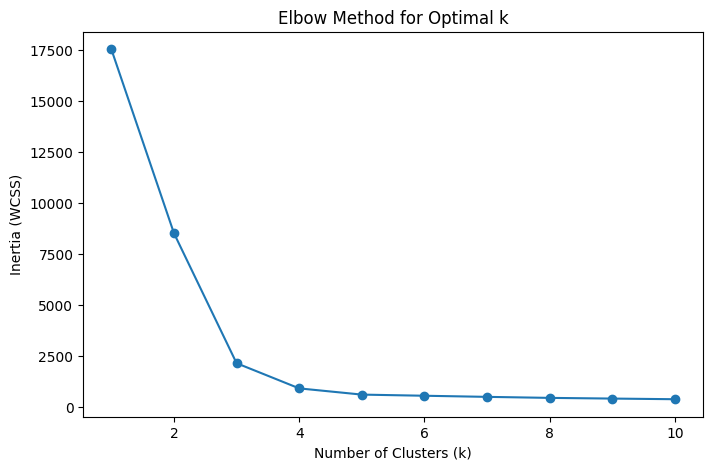

In [11]:
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.05, random_state=42)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

optimal_k = 4

In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X)

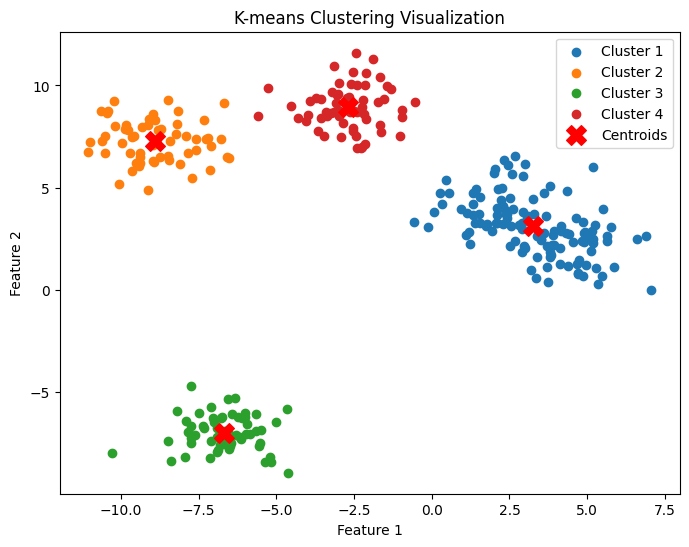

In [13]:
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label='Centroids')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering Visualization")
plt.legend()
plt.show()

5. Illustrate the K-mode clustering to cluster the bank customers. 

In [14]:
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 160.0
Run 2, iteration: 2/100, moves: 11, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 182.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 166.0
Best run was number 2


c:\Users\Harsh Agrawal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Harsh Agrawal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


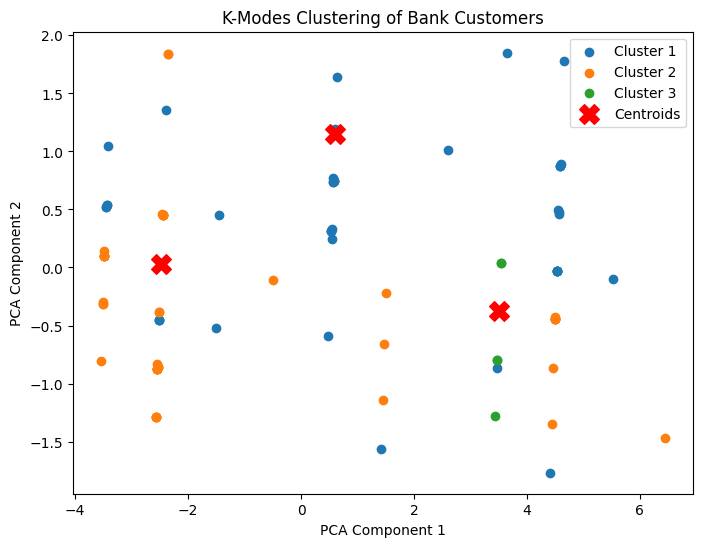

In [15]:
file_path = "bank_customer.xlsx"  
df = pd.read_excel(file_path)

for col in df.columns:
    df[col] = df[col].astype('category').cat.codes

k = 3  
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df)

df['Cluster'] = clusters

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(df_pca[df['Cluster'] == i, 0], df_pca[df['Cluster'] == i, 1], label=f'Cluster {i+1}')

plt.scatter(pca.transform(km.cluster_centroids_)[:, 0], pca.transform(km.cluster_centroids_)[:, 1], 
            color='red', marker='X', s=200, label='Centroids')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Modes Clustering of Bank Customers")
plt.legend()
plt.show()